In [41]:
import os
import torch
from torch import nn
import random

In [42]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import transforms

In [43]:
def get_fashion_mnist_test_data():
    f_mnist_test_images = datasets.FashionMNIST("./data", train=False, download=True)
    f_mnist_test = datasets.FashionMNIST("./data", train=False, download=True, transform=transforms.ToTensor())
    
    print("Num Test Samples: ", len(f_mnist_test))
    print("Sample Shape: ", f_mnist_test[0][0].shape)  # torch.Size([1, 28, 28])

    test_data_loader = DataLoader(dataset=f_mnist_test, batch_size=len(f_mnist_test))

    f_mnist_transforms = nn.Sequential(
        transforms.ConvertImageDtype(torch.float),
        transforms.Normalize(mean=0.2860495448112488, std=0.32041478157043457), 
                    # train 데이터와 동일한 값으로 정규화를 해주어야 train data로 학습한 패턴을 적용할 수 있다.
    )

    return f_mnist_test_images, test_data_loader, f_mnist_transforms

In [44]:
def get_vgg_model(dropout=0.5):
    def vgg_block(num_conv_layer, out_channels):
        layers = []
        for _ in range(num_conv_layer):
            layers.append(nn.LazyConv2d(
                out_channels=out_channels, kernel_size=3, padding=1
                )
            )
            layers.append(nn.BatchNorm2d(num_features=out_channels))
            layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        block = nn.Sequential(*layers)
        return block
    
    class VGG(nn.Module):
        def __init__(self, block_info, n_output=10):
            super().__init__()
            conv_blocks=[]
            for(num_conv_layers, out_channels) in block_info:
                conv_blocks.append(vgg_block(num_conv_layers, out_channels))
            
            self.model = nn.Sequential(
                *conv_blocks,
                nn.Flatten(), 
                nn.LazyLinear(out_features = 256),
                nn.ReLU(),
                nn.Dropout(p=dropout),
                nn.LazyLinear(out_features = 128),
                nn.ReLU(),
                nn.LazyLinear(out_features = 64),
                nn.ReLU(),
                nn.Dropout(p=dropout),
                nn.LazyLinear(n_output)
            )
            
        def forward(self, x):
            x = self.model(x)
            return x
    
    my_model = VGG(
        block_info = (
            (3, 128), (3, 256)
        ),
        n_output = 10
    )
    return my_model
        

In [45]:
class ClassificationTester:
  def __init__(self, project_name, model, test_data_loader, transforms, checkpoint_file_path):
    self.project_name = project_name
    self.model = model
    self.test_data_loader = test_data_loader
    self.transforms = transforms
    self.latest_file_path = os.path.join(
      checkpoint_file_path, f"{project_name}.pt"
    )

    print("MODEL FILE: {0}".format(self.latest_file_path))

    self.model.load_state_dict(torch.load(self.latest_file_path, map_location=torch.device('cpu')))

  def test(self):
    self.model.eval()    # Explained at 'Diverse Techniques' section

    num_corrects_test = 0
    num_tested_samples = 0

    with torch.no_grad():
      for test_batch in self.test_data_loader:
        input_test, target_test = test_batch

        if self.transforms:
          input_test = self.transforms(input_test)

        output_test = self.model(input_test)

        predicted_test = torch.argmax(output_test, dim=-1)
        num_corrects_test += torch.sum(torch.eq(predicted_test, target_test))

        num_tested_samples += len(input_test)

      test_accuracy = 100.0 * num_corrects_test / num_tested_samples

    print(f"TEST RESULTS: {test_accuracy:6.3f}%")

  def test_single(self, input_test):
    self.model.eval()    # Explained at 'Diverse Techniques' section

    with torch.no_grad():
      input_test = self.transforms(input_test)

      output_test = self.model(input_test)
      predicted_test = torch.argmax(output_test, dim=-1)

    return predicted_test.item()


In [ ]:
CHECKPOINT_FILE_PATH = os.path.join(os.getcwd(), "checkpoints")
f_mnist_test_images, test_data_loader, f_mnist_transforms = get_fashion_mnist_test_data()

In [48]:
test_model22 = get_vgg_model()
classification_tester22 = ClassificationTester(
    "22", test_model22, test_data_loader, f_mnist_transforms, CHECKPOINT_FILE_PATH
  )
classification_tester22.test()

MODEL FILE: C:\Users\pc\PycharmProjects\link_dl\git\link_dl\_03_your_code\3\checkpoints\22.pt


C:\Users\pc\AppData\Local\Temp\ipykernel_17760\3970931959.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self.latest_file_path, m

TEST RESULTS: 93.220%


In [49]:
test_model23 = get_vgg_model()
classification_tester23 = ClassificationTester(
    "23", test_model23, test_data_loader, f_mnist_transforms, CHECKPOINT_FILE_PATH
  )
classification_tester23.test()

MODEL FILE: C:\Users\pc\PycharmProjects\link_dl\git\link_dl\_03_your_code\3\checkpoints\23.pt


C:\Users\pc\AppData\Local\Temp\ipykernel_17760\3970931959.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self.latest_file_path, m

TEST RESULTS: 93.660%


[문제 4] 샘플 테스트 데이터 분류 예측 결과 확인하기  
– 10,000개의 테스트 데이터 중 10개를 임의로 선
1) 해당 이미지를 출력 
2) 해당 이미지의 레이블을 출력
3) 학습 완료된 모델을 사용하여 해당 이미지의 분류 예측 결과를 출력하여  
4) 이미지 레이블과 분류 예측결과가 동일한지 점검

In [62]:
check = False #잘못 예측된 것이 뽑혔는지 확인하는 용도
while True:
    labels = []
    num_samples = 10  # 선택할 샘플 수
    total_samples = len(test_data_loader.dataset)
    random_indices = random.sample(range(total_samples), num_samples)
    for idx in random_indices:
        image, label = f_mnist_test_images[idx]
        image = transforms.ToTensor()(image).unsqueeze(0)
        predicted_label22 = classification_tester22.test_single(image)
        predicted_label23 = classification_tester23.test_single(image)
        labels.append({"idx": idx,"label":label, "label22":predicted_label22, "label23":predicted_label23})
        if label != predicted_label22 or label != predicted_label23:
            check = True
    if check == True:# 잘못 뽑힌 것이 있을 경우만 내보냄
        break    

for label in labels:
    print(label) # 9251이 잘못 예측됨 
                 # T-shirt/top 인데 Coat로 예측됨

{'idx': 1082, 'label': 1, 'label22': 1, 'label23': 1}
{'idx': 2637, 'label': 4, 'label22': 4, 'label23': 4}
{'idx': 7181, 'label': 6, 'label22': 6, 'label23': 6}
{'idx': 8492, 'label': 7, 'label22': 7, 'label23': 7}
{'idx': 2119, 'label': 3, 'label22': 3, 'label23': 3}
{'idx': 7534, 'label': 8, 'label22': 8, 'label23': 8}
{'idx': 4663, 'label': 8, 'label22': 8, 'label23': 8}
{'idx': 9707, 'label': 5, 'label22': 5, 'label23': 5}
{'idx': 8895, 'label': 2, 'label22': 2, 'label23': 2}
{'idx': 9251, 'label': 0, 'label22': 4, 'label23': 4}


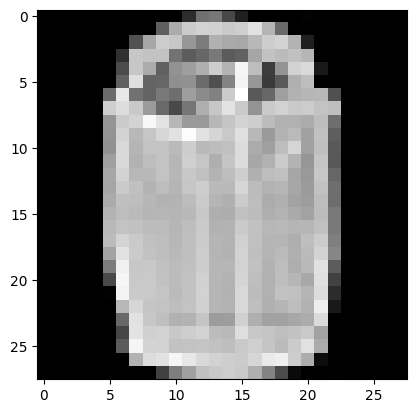

In [74]:
import matplotlib.pyplot as plt

# Coat로 예측된 T-Shirt 샘플
image, label1 = f_mnist_test_images[9251]
image = transforms.ToTensor()(image).unsqueeze(0)
plt.figure(figsize=(12, 6))
plt.imshow(image.squeeze(0).squeeze(0), cmap='gray')
plt.show()

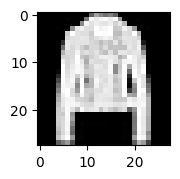

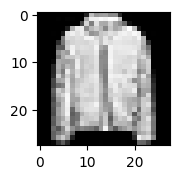

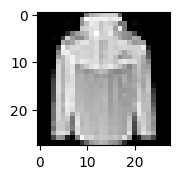

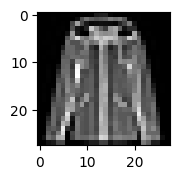

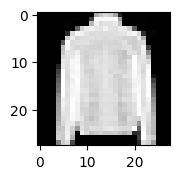

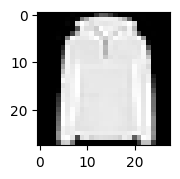

In [88]:
# 원래 Coat인 샘플
for i, idx in enumerate({2637, 8673, 7733,2570, 9509, 815}):
    image, label2 = f_mnist_test_images[idx]
    image = transforms.ToTensor()(image).unsqueeze(0)
    plt.figure(figsize=(12, 6))
    plt.subplot(1,6,i+1)
    plt.imshow(image.squeeze(0).squeeze(0), cmap='gray')
plt.show()
#{'idx': 8673, 'label': 4, 'label22': 4, 'label23': 4}
#{'idx': 7733, 'label': 4, 'label22': 4, 'label23': 4}
#{'idx': 2570, 'label': 4, 'label22': 4, 'label23': 4}
#{'idx': 9509, 'label': 4, 'label22': 4, 'label23': 4}
#{'idx': 815, 'label': 4, 'label22': 4, 'label23': 4}

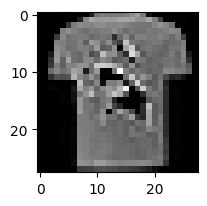

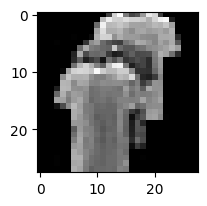

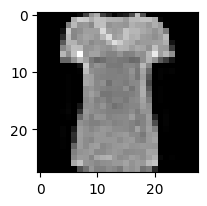

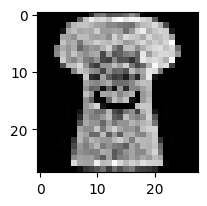

In [81]:
# 원래 T-shirt인 샘플
for i, idx in enumerate({3504, 4454,4351, 8420}):
    image, label3 = f_mnist_test_images[idx]
    image = transforms.ToTensor()(image).unsqueeze(0)
    plt.figure(figsize=(12, 6))
    plt.subplot(1,5,i+1)
    plt.imshow(image.squeeze(0).squeeze(0), cmap='gray')
plt.show()

#{'idx': 4454, 'label': 0, 'label22': 0, 'label23': 0}
#{'idx': 3504, 'label': 0, 'label22': 0, 'label23': 0}
#{'idx': 4351, 'label': 0, 'label22': 0, 'label23': 0}
#{'idx': 8420, 'label': 0, 'label22': 0, 'label23': 0}

# 잘못 예측된 이유 예상하기
- label 0과 4의 차이를 보기 위해서 여러번 랜덤으로 예측을 진행해 0 또는 4의 label을 가지는 샘플을 찾아서 이미지를 출력진행했다.
- 샘플 개수가 부족해서 그런지 몰라도 0에서 반팔만 출력되었고, 여기서 확실하게 반팔임을 알 수 있게 팔쪽이 잘려 있는 모습이 보인다.
- 반면 9251 샘플의 경우 잘려 있지 않아 잘못 예측된 것이 아닐까라는 생각이 들었다.
- 만약 label 0에 긴팔도 다수 있는데 내가 보지 못한 것이라면 9251 샘플의 경우 label 4에서 뽑은 샘플 중 4번째와 같이 목 근처의 부분과 그 외의 부분 색 차이가 나는 모습이 보이는데, 이에 따라 잘못 예측된 것 같다.


# 숙제 후기

적절한 하이퍼파라미터 또는 모델 구조를 찾는 방법이 따로 있는게 아니라 경험상으로 좋을 것 같다를 찾아야 하는게 어려웠다.